### Data exploration (Trump's tweets)

In [185]:
import pandas as pd
import re
import numpy as np

In [138]:
data = pd.read_csv('trump_20200530.csv')

In [139]:
# see what columns are in the data set
data.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [140]:
# check the shape
data.shape

(18467, 7)

In [141]:
# check the top rows
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @ScottAdamsSays: Malaria drug and zinc the ...,05-30-2020 03:26:31,10566,0,True,1266571665204527109
1,Twitter for iPhone,RT @YoungDems4Trump: In Democrat cities you ca...,05-30-2020 03:21:41,22320,0,True,1266570449431003138
2,Twitter for iPhone,RT @YoungDems4Trump: So sad. This poor busines...,05-30-2020 03:21:32,23961,0,True,1266570411678019584
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,05-30-2020 03:20:18,42879,164022,False,1266570099454103553
4,Twitter for iPhone,RT @TallahForTrump: Trump spoke at my church i...,05-30-2020 03:19:01,36563,0,True,1266569778770182151


In [142]:
# check the bottom rows
data.tail()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
18462,Twitter for iPhone,January 20th 2017 will be remembered as the da...,01-20-2017 17:53:17,60604,218555,False,822502270503972872
18463,Twitter for iPhone,What truly matters is not which party controls...,01-20-2017 17:52:45,42790,180394,False,822502135233384448
18464,Twitter for iPhone,power from Washington D.C. and giving it back ...,01-20-2017 17:51:58,18362,91143,False,822501939267141634
18465,Twitter for iPhone,Today we are not merely transferring power fro...,01-20-2017 17:51:25,20125,109640,False,822501803615014918
18466,Twitter for Android,It all begins today! I will see you at 11:00 A...,01-20-2017 12:31:53,70523,268372,False,822421390125043713


In [143]:
# check for na values
data.isna().sum()

source             0
text               0
created_at         0
retweet_count      0
favorite_count     0
is_retweet        58
id_str             0
dtype: int64

In [144]:
data.describe()

,retweet_count,favorite_count,id_str
count,18467.000000,18467.000000,1.846700e+04
mean,17753.247306,58623.881193,1.118379e+18
std,13060.852549,60661.448610,1.188340e+17
min,0.000000,0.000000,8.224214e+17
25%,9701.500000,0.000000,1.037514e+18
50%,15403.000000,57571.000000,1.156175e+18
75%,22469.000000,91086.500000,1.214196e+18
max,369530.000000,879647.000000,1.266572e+18


In [145]:
data.retweet_count.describe()

count     18467.000000
mean      17753.247306
std       13060.852549
min           0.000000
25%        9701.500000
50%       15403.000000
75%       22469.000000
max      369530.000000
Name: retweet_count, dtype: float64

In [146]:
data.source.unique()

array(['Twitter for iPhone', 'Twitter Media Studio', 'Twitter Web App',
       'Twitter Web Client', 'Twitter for iPad', 'Media Studio',
       'Twitter Ads', 'Twitter for Android'], dtype=object)

In [147]:
data.source.nunique()

8

**Observation:**
- There are 18,467 rows in this data set.
- There are 7 columns, namely *'source', 'text', 'created_at', 'retweet_count', 'favorite_count','is_retweet', 'id_str'*.
- There are 58 NA values in the *is_reweet* column. There is no NA values for other columns.
- There is a combination of retweet and original tweets
- The retweet_count fluctunate a lot, ranging from 0 to 36,9530. The fluctuation maybe related to time, and the text of tweet, is_reweet.
- 8 different devices are used.

#### Clean the data. 

#### Rremove the rows with NA values

In [148]:
data = data.dropna()
data.shape

(18409, 7)

**Rationale:** \
Removing NA values is convenient for downstream analysis. And there are only 58 rows containing NA values, which only accounts for less than 1% of the total data set. Therefore, it is okay to remove these rows without much change to the overall data set. 

#### Cleaning Twitter texual data

In [149]:
data['text']

0        RT @ScottAdamsSays: Malaria drug and zinc the ...
1        RT @YoungDems4Trump: In Democrat cities you ca...
2        RT @YoungDems4Trump: So sad. This poor busines...
3         Time for a change! #2020 https://t.co/AECy2GBfys
4        RT @TallahForTrump: Trump spoke at my church i...
                               ...                        
18462    January 20th 2017 will be remembered as the da...
18463    What truly matters is not which party controls...
18464    power from Washington D.C. and giving it back ...
18465    Today we are not merely transferring power fro...
18466    It all begins today! I will see you at 11:00 A...
Name: text, Length: 18409, dtype: object

In [150]:
def text_clean(text):
    text = text.lower() # lowercase
    text = re.sub(r'http\S+', '', text) # remove url
    #text = re.sub(r"(?<![@\w])@(\w{1,25}(:|))", '', text) #remove @
    text = re.sub(r'\brt\b', '', text) # remove rt
    text = re.sub(r"(?<![#\w])#(\w{1,25})", '',text) #remove hashtags, including the text after hashtags
    #text = re.sub(r"[^\w\s]", '',text) #remove puntucation
    text = re.sub(r"\s+", ' ',text) #remove multiple space
    text = re.sub(r"[0-9]", '',text) #remove numbers
    return text

In [151]:
# Apply the text_clean funtion to the text column and create a new column called clean_text
data['clean_text'] = data.text.apply(text_clean)

In [152]:
# display and compare
data.loc[0:3,['text','clean_text']]

,text,clean_text
0,RT @ScottAdamsSays: Malaria drug and zinc the ...,@scottadamssays: malaria drug and zinc the mi...
1,RT @YoungDems4Trump: In Democrat cities you ca...,@youngdemstrump: in democrat cities you can g...
2,RT @YoungDems4Trump: So sad. This poor busines...,@youngdemstrump: so sad. this poor business o...
3,Time for a change! #2020 https://t.co/AECy2GBfys,time for a change!


**Rationale:** 
 - Text need to be lowercase to keep uniform.
 - Raw twitter text contains urls that are not very informative. Therefore, remove the urls.
 - Keep @people for now since we can use the tweet tokenizer to deal with @ in downstream analysis.
 - Keep the puncutations for now, or it will remove @. I'll clean the punctuation after tokenization.
 - Remove "RT" since the retweet information is already be captured by @ and the is_retweet column. "RT" is redundant.

### Tokenization

1) NLTK tokenizer

In [153]:
from nltk.tokenize import word_tokenize

In [154]:
data['nltk_tokenizer'] = data.clean_text.apply(word_tokenize)

2) Tweet tokenizer

In [155]:
from nltk.tokenize import TweetTokenizer

In [156]:
tk = TweetTokenizer()
data['tweet_tokenizer'] = data.clean_text.apply(tk.tokenize)

3) NLTK WhitespaceTokenizer

In [157]:
from nltk.tokenize import WhitespaceTokenizer

In [158]:
wk = WhitespaceTokenizer()
data['white_tokenizer'] = data.clean_text.apply(wk.tokenize)

#### Display and compare

In [159]:
# Put clean_text and results of tokenizers into a dataframe
df_tokenizer = pd.DataFrame([data.nltk_tokenizer, data.tweet_tokenizer,data.white_tokenizer]).transpose()
# display
df_tokenizer.head()

,nltk_tokenizer,tweet_tokenizer,white_tokenizer
0,"[@, scottadamssays, :, malaria, drug, and, zin...","[@scottadamssays, :, malaria, drug, and, zinc,...","[@scottadamssays:, malaria, drug, and, zinc, t..."
1,"[@, youngdemstrump, :, in, democrat, cities, y...","[@youngdemstrump, :, in, democrat, cities, you...","[@youngdemstrump:, in, democrat, cities, you, ..."
2,"[@, youngdemstrump, :, so, sad, ., this, poor,...","[@youngdemstrump, :, so, sad, ., this, poor, b...","[@youngdemstrump:, so, sad., this, poor, busin..."
3,"[time, for, a, change, !]","[time, for, a, change, !]","[time, for, a, change!]"
4,"[@, tallahfortrump, :, trump, spoke, at, my, c...","[@tallahfortrump, :, trump, spoke, at, my, chu...","[@tallahfortrump:, trump, spoke, at, my, churc..."


The nltk tokenizer separate by puncutaions and space. So, @ and scottadamssays got separated. 
The tweet tokenizer can identify @scottadamssay as an inseparable part. 
The white tokenizer only separate sentences by white space. 

#### Compare tokenizers

In [160]:
# Look closely into specific texts
data.loc[6,['clean_text','nltk_tokenizer','tweet_tokenizer','white_tokenizer']]

clean_text          @jim_jordan: right on! we don’t have to pay o...
nltk_tokenizer     [@, jim_jordan, :, right, on, !, we, don, ’, t...
tweet_tokenizer    [@jim_jordan, :, right, on, !, we, don, ’, t, ...
white_tokenizer    [@jim_jordan:, right, on!, we, don’t, have, to...
Name: 6, dtype: object

**Comparison**
- The nltk tokenizer dose not work well when it runs to @.
- The tweet tokenizer and whitespace tokenizer treat @jim_jordan as inseparable. This makes sense.
- The whitespace tokenizer cannot separate "on!" since there is no space between "on" and "!". This is not the desired result. The puncutations right after a word bring noise to the text.

**Conclusion**
- The tweet tokenizer works the best. 
- It can recognize @people as a whole part, and also does a good job to separate by other punctuaions and white space.

### Analyze Data for Sentiment with 3 methods, namely VADER, Textblob, and Empath

In [161]:
# prepare the dataframe for sentiment analysis
df_sent = pd.DataFrame([data.clean_text]).transpose()
df_sent.head()

,clean_text
0,@scottadamssays: malaria drug and zinc the mi...
1,@youngdemstrump: in democrat cities you can g...
2,@youngdemstrump: so sad. this poor business o...
3,time for a change!
4,@tallahfortrump: trump spoke at my church in ...


1) VADER

In [162]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [163]:
analyzer = SentimentIntensityAnalyzer()
def sentInterpret(text):
    score = analyzer.polarity_scores(text)
    com = score['compound']
    if com >= 0.05:
        sent = 'positive'
    elif com <= -0.05:
        sent = 'negative'
    else:
        sent = 'neutral'
    return sent

In [164]:
df_sent['vader'] = df_sent.clean_text.apply(analyzer.polarity_scores)

In [165]:
df_sent['vader_compound'] = df_sent.clean_text.apply(sentInterpret)

In [166]:
df_sent.head()

,clean_text,vader,vader_compound
0,@scottadamssays: malaria drug and zinc the mi...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",negative
1,@youngdemstrump: in democrat cities you can g...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",negative
2,@youngdemstrump: so sad. this poor business o...,"{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'comp...",negative
3,time for a change!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,@tallahfortrump: trump spoke at my church in ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [167]:
# note: three probabilities (neg, neu, pos) will add up to 100%.

In [168]:
# Check the distribution of vader sentiment
df_sent['vader_compound'].value_counts()

positive    9437
negative    5405
neutral     3567
Name: vader_compound, dtype: int64

In [169]:
print('Percentage of Positive Tweets: ', round(df_sent['vader_compound'].value_counts()[0]/df_sent.shape[0]*100, 2))
print('Percentage of Negative Tweets: ', round(df_sent['vader_compound'].value_counts()[1]/df_sent.shape[0]*100, 2))
print('Percentage of Neutral Tweets: ', round(df_sent['vader_compound'].value_counts()[2]/df_sent.shape[0]*100, 2))

Percentage of Positive Tweets:  51.26
Percentage of Negative Tweets:  29.36
Percentage of Neutral Tweets:  19.38


**Observation**

- Based on the compound value of VADER, I categorized tweets into 3 polarities, namely "positive", "negative", and "neutral".
- The distribution shows that 51.26% of tweets are positive, 29.36% of tweets are negative. This indicates that the overall sentiment of the tweets are positive.

2) TextBlob

In [170]:
from textblob import TextBlob

In [171]:
df_sent['textblob_polarity'] = df_sent['clean_text'].apply(lambda tweet: TextBlob(tweet).sentiment[0])
df_sent['textblob_subjectivity'] = df_sent['clean_text'].apply(lambda tweet: TextBlob(tweet).sentiment[1])

In [172]:
df_sent.head()

,clean_text,vader,vader_compound,textblob_polarity,textblob_subjectivity
0,@scottadamssays: malaria drug and zinc the mi...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",negative,-0.200000,0.050000
1,@youngdemstrump: in democrat cities you can g...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",negative,0.000000,0.000000
2,@youngdemstrump: so sad. this poor business o...,"{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'comp...",negative,-0.341667,0.658333
3,time for a change!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,0.000000
4,@tallahfortrump: trump spoke at my church in ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,0.000000,0.000000


- For TextBlob, the polarity score is a float within the range [-1.0, 1.0].  -1 defines a negative sentiment and 1 defines a positive sentiment
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

<AxesSubplot:ylabel='Frequency'>

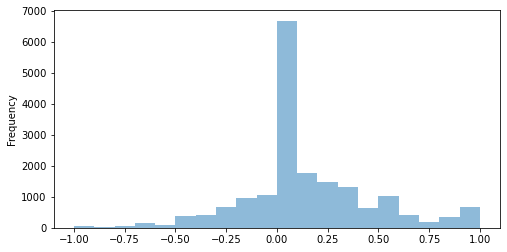

In [217]:
# Plot of the sentiment polarity
plt.rcParams["figure.figsize"] = (8,4)
df_sent.textblob_polarity.plot.hist(bins=20, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

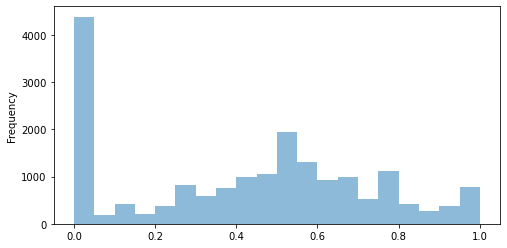

In [218]:
# Plot of the subjectivity
plt.rcParams["figure.figsize"] = (8,4)
df_sent.textblob_subjectivity.plot.hist(bins=20, alpha=0.5)

**Observation**

- Based on the histogram of sentiment polarity, most of the tweets are neutral. 
- There are more positive tweets than negative tweets. This is aligned with the VADER result.
- Based on histogram of subjectivity, there are many objective tweets (near the 0.0 x-axis), indicating that Trump's tweets tend to convey objective feelings and opinions, rather than subjective facts.

3) Empath

In [175]:
from empath import Empath

In [176]:
lexicon = Empath()
def empath_text(text):
    cat_list = []
    categ = lexicon.analyze(text, normalize=True)
    try:
        for key, value in categ.items():
            if value != 0:
               cat_list.append(key)
    except:
        pass
    return cat_list

In [177]:
df_sent['empath'] = df_sent.clean_text.apply(empath_text)

In [180]:
df_sent.head(3)

,clean_text,vader,vader_compound,textblob_polarity,textblob_subjectivity,empath
0,@scottadamssays: malaria drug and zinc the mi...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",negative,-0.200000,0.050000,"[health, internet, messaging]"
1,@youngdemstrump: in democrat cities you can g...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",negative,0.000000,0.000000,[business]
2,@youngdemstrump: so sad. this poor business o...,"{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'comp...",negative,-0.341667,0.658333,"[occupation, wealthy, real_estate, business, p..."


In [212]:
# Put empath outputs into a flat list
list_empath = df_sent['empath'].to_list()
flat_list = list(np.concatenate(list_empath).flat)

# Count the frequencies of empath sentiments
from collections import Counter
counter=Counter(flat_list)
inter=[list(counter.keys()),list(counter.values())]
empath_count = pd.DataFrame(np.array(inter).T, columns=['Empath','Count'])
empath_count['Count'] = empath_count['Count'].astype(int)
empath_count = empath_count.sort_values(by ='Count', ascending=False )

In [213]:
# Show top 10 frequently mentioned Empath themes
empath_count[0:10]

,Empath,Count
30,leader,4367
73,government,4353
41,positive_emotion,4209
56,achievement,3961
3,business,3474
58,politics,3125
8,negative_emotion,3092
24,giving,3081
81,work,2854
91,law,2754


**Observation**

- As showed in the empath_count dataframe, "leader", "government" are the main and dominating themes of these tweets.
- There are more positive_emotion thant negative_emotion. This is aligned with the VADER sentiment analysis, which shows 51.26% of tweets are positive, and 29.36% of tweets are negative.

#### Comparsion across the methods

**Similarities:**
- All 3 sentiment analysis methods are rule-based. So, there is no need to train and fit the data beforehand. The analysis is very fast.
- Both VADER and Textblob output a numeric score from -1 to +1 of the sentiment, which is convenient to us in regression analysis.

**Differences:**
- Empath does not give a numeric score. Instead, it gives a list of themes that is contained in the text, such as "health", "violence". 
- VADER has already defined a rule/threshold to categorize into positive, negative, and neutral sentiments. Differently, TextBlob does not provide a threshold. Therefore, the boundaries between positive/negative and neutral is much more vague. Users need to define their own rules/threshold to categorize into positive, negative, and neutral sentiments.
- VADER works better with microblog texts.

#### Quantitatively comparing methods

**Rationale**:
- Both the VADER and TextBlob report a numeric sentiment polarity score. The VADER already defines its way to categorize sentiment polarity into positive, negative, and neutral. So, I need to define a threshold to categorize TextBlob results into the positive, negative, and neutral in order to compare between these two methods.
- Check the distribution of TextBlob's polarity results to decide the threshold.
- See how many tweets are mactched beween VADER and TextBlob. 
- Divide the number by the total number of tweets to compute the proportion.

<AxesSubplot:ylabel='Frequency'>

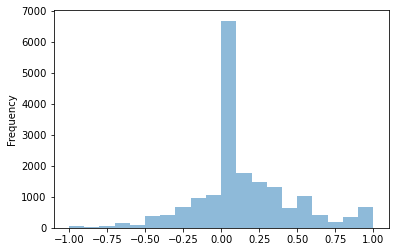

In [161]:
# Plot of the sentiment polarity
df_sent.textblob_polarity.plot.hist(bins=20, alpha=0.5)

In [249]:
# Define a function to categorize sentiment
def textblob_cat(polarity_score):
    if polarity_score <= (0 - 0.08/2):
        sent = 'negative'
    elif polarity_score >= 0.08/2:
        sent = 'positive'
    else:
        sent = 'neutral'
    return sent

In [250]:
df_sent['textblob_cat'] = df_sent.textblob_polarity.apply(textblob_cat)

In [251]:
def if_match(vader, textblob):
    if vader == textblob:
        result = 'Match'
    else:
        result = 'NoMatch'
    return result

In [252]:
df_sent['Match'] = df_sent.apply(lambda df_sent: if_match(df_sent.vader_compound, df_sent.textblob_cat), axis=1)

In [253]:
df_sent.head(3)

,clean_text,vader,vader_compound,textblob_polarity,textblob_subjectivity,empath,textblob_cat,Match
0,@scottadamssays: malaria drug and zinc the mi...,"{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'comp...",negative,-0.200000,0.050000,"[health, internet, messaging]",negative,Match
1,@youngdemstrump: in democrat cities you can g...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",negative,0.000000,0.000000,[business],neutral,NoMatch
2,@youngdemstrump: so sad. this poor business o...,"{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'comp...",negative,-0.341667,0.658333,"[occupation, wealthy, real_estate, business, p...",negative,Match


In [254]:
print('Percentage of match: ', round(df_sent['Match'].value_counts()[0]/df_sent.shape[0]*100, 2))

Percentage of match:  63.49


**Observation**:
- I experimented with different thresholds, e.g., 0.1, 0.05, 0.08. 0.2. The threshold of 0.08 has the best performance.
- Even for the best result, Only 63.49% of the sentiment polarity match between VADER and TextBlob.
- The differences is resulted from TextBlob failing to recognize negative sentiment in some tweets. For example, the tweet "@youngdemstrump: in democrat cities you can get arrested for opening a business but not for looting one." is categorized as Negative by VADER. But the TextBlob give a polarity score of 0.00, leading to a Neutral category.

#### A mixed method of qualitative + quantitative
- Randomly pick 25 tweets. 
- By hand, mark each of their sentiments. 
- Pick two sentiment analysis methods.
- Compare the results of hand labeling and output of 3 methods

In [268]:
# Randomly pick 25 tweets
df_3c = df_sent.sample(n=25)
df_3c = df_3c.reset_index() 

In [270]:
# Label the sentiments by hand, created a new column called "manual"
sent_hand = ['positive', 'negative','neutral','positive','neutral',
             'positive','neutral','negative','neutral','positive',
             'neutral','neutral','negative','neutral','negative',
            'negative','negative','neutral','positive','negative',
             'negative','negative', 'negative','positive', ' positive']
df_3c['manual'] = sent_hand

In [303]:
# Compare among VADER, TextBlob, and Manual labels
df_3c['Match_VADER'] = df_3c.apply(lambda df_3c: if_match(df_3c.vader_compound, df_3c.manual), axis=1)
df_3c['Match_Textblob'] = df_3c.apply(lambda df_3c: if_match(df_3c.textblob_cat, df_3c.manual), axis=1)

In [313]:
df_3c.head(3)

,index,clean_text,vader,vader_compound,textblob_polarity,textblob_subjectivity,empath,textblob_cat,Match,manual,Match_VADER,Match_Textblob
0,10372,emmet flood who came to the white house to hel...,"{'neg': 0.067, 'neu': 0.672, 'pos': 0.261, 'co...",positive,0.325000,0.43125,"[help, domestic_work, occupation, crime, journ...",positive,Match,positive,Match,Match
1,2067,the world market for face masks and ventilator...,"{'neg': 0.112, 'neu': 0.854, 'pos': 0.033, 'co...",negative,-0.161553,0.69697,"[money, computer, fear, business, body, commun...",negative,Match,negative,Match,Match
2,3129,@repleezeldin: the more drained out the swamp...,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",negative,0.500000,0.50000,"[water, speaking]",positive,NoMatch,neutral,NoMatch,NoMatch


In [308]:
df_3c['Match_VADER'].value_counts()

Match      15
NoMatch    10
Name: Match_VADER, dtype: int64

In [309]:
df_3c['Match_Textblob'].value_counts()

Match      13
NoMatch    12
Name: Match_Textblob, dtype: int64

**Observation**
- VADER matched 15 out of 25 tweets correctly.
- Textblob matched 13 out of 25 tweets correctly.
- VADER works better than Textblob. 
- For example, for the tweet "@whitehouse: “we're at war with covid- we're at war with terrorists and we are at war with the drug cartels . . . we're the united s…". This tweet is labeled as negative by hand. VADER successfully categorized it as negative, while Textblob considers this as of neutral sentiment.

In [312]:
df_3c.loc[15]['clean_text']

" @whitehouse: “we're at war with covid- we're at war with terrorists and we are at war with the drug cartels . . . we're the united s…"

In [311]:
df_3c.loc[15]

index                                                                 1863
clean_text                @whitehouse: “we're at war with covid- we're ...
vader                    {'neg': 0.389, 'neu': 0.542, 'pos': 0.069, 'co...
vader_compound                                                    negative
textblob_polarity                                                      0.0
textblob_subjectivity                                                  0.0
empath                           [government, death, military, fight, war]
textblob_cat                                                       neutral
Match                                                              NoMatch
manual                                                            negative
Match_VADER                                                          Match
Match_Textblob                                                     NoMatch
Name: 15, dtype: object

###  Analyze Data with LIWC

#### 0. Preparation, functions

In [56]:
import math
from numpy import nan

In [57]:
# load the LIWC dictionary
liwc = pd.read_csv('LIWC2015 dictionary poster.xlsx - 2015-08-24-LIWC2015 - Poster.csv',skiprows=1)

In [59]:
# Treat the entire data set as a corpus
# Combine all unigrams into a list
df_q4 = df_sent.copy()
tweets_list = df_q4.clean_text.tolist()
# Put all tweets text into a string
tweets_string = '-'.join([str(n) for n in tweets_list])

In [60]:
# clean
tweets_clean = text_clean(tweets_string)
# remove puncutations
tweets_clean = re.sub(r"[^\w\s]", '',tweets_clean) #remove puntucation

In [61]:
# Tokenize the tweets_string using the Twitter tokenizer
tk = TweetTokenizer()
tweet_tokenized = tk.tokenize(tweets_clean)
tweet_tokenized[0:5]

['scottadamssays', 'malaria', 'drug', 'and', 'zinc']

tweet_tokenized contains all the tokenized words of the entire tweet data set

In [113]:
def replace_star(list):
    for i in range(len(list)):
        list[i] = list[i].replace('*','.')
    return list

In [114]:
def replace_quote(list):
    for i in range(len(list)):
        list[i] = list[i].replace("'",'')
    return list

In [115]:
# Define a function to calculate the proportion of the selected dimension of the entire tweet data set
def cal_pro(list):
    k = 0
    for i in range(len(list)):
        for unigram in tweet_tokenized:
            result = re.match(list[i], unigram)
            if result:
                k = k + 1
            else:
                continue
    pro = round(k/len(tweet_tokenized)*100, 2)
    return pro

#### 1. Comparison between Friend dimension and Family dimension
- Look into the Friend dimension and Family dimension.
- Which dimension is mentioned more frequently in the entire tweet data set.

#### Friend

In [123]:
# Friend
list_friend = liwc.iloc[:,66].tolist()
list_friend = [item for item in list_friend if not(pd.isnull(item)) == True]
list_friend[0:5]

['accomplice*', 'acquainta*', 'ally', 'amigo*', 'babe*']

In [124]:
list_friend = replace_star(list_friend)
list_friend = replace_quote(list_friend)
list_friend[0:5]

['accomplice.', 'acquainta.', 'ally', 'amigo.', 'babe.']

In [125]:
# Calculate the proportion of Friend in the data set
cal_pro(list_friend)

0.23

#### Family

In [128]:
# Famliy
list_family = liwc.iloc[:,65].tolist()
list_family = [item for item in list_family if not(pd.isnull(item)) == True]
list_family[0:5]

['aunt*', 'babies', 'baby', 'bro', "bro'*"]

In [129]:
list_family = replace_star(list_family)
list_family = replace_quote(list_family)
list_family[0:5]

['aunt.', 'babies', 'baby', 'bro', 'bro.']

In [130]:
# Calculate the proportion of Family in the data set
cal_pro(list_family)

2.2

**Observation:**\
In Trump's tweets, the "Friend" dimension accounts for 0.23% of the total corpus. And the "Family" dimension accounts for 2.2% of the total corpus.\
The proportion of "Family" is nearly 10 times of the proportion of "Friend". This may indicate that Trump's tweets are more targeted at people's feeling toward family members, intead of frineds. But this need more in-depth analysis before getting the conclusion.

#### 2. Comparison between Female dimension and Male dimension
- Look into the Female dimension and Male dimension.
- Which dimension is mentioned more frequently in the entire tweet data set.

In [99]:
# Female
list_female = liwc.iloc[:,67].tolist()
list_female = [item for item in list_female if not(pd.isnull(item)) == True]
list_female[0:5]

['aunt*', 'bachelorette', 'bride*', 'chick', "chick'*"]

In [100]:
list_female = replace_star(list_female)
list_female = replace_quote(list_female)
list_female[0:5]

['aunt.', 'bachelorette', 'bride.', 'chick', 'chick.']

In [101]:
# Calculate the proportion of Female in the data set
cal_pro(list_female)

1.57

In [102]:
# Male
list_male = liwc.iloc[:,68].tolist()
list_male = [item for item in list_male if not(pd.isnull(item)) == True]

In [103]:
list_male = replace_star(list_male)
list_male = replace_quote(list_male)

In [104]:
# Calculate the proportion of Female in the data set
cal_pro(list_male)

2.96

**Observation:**\
In Trump's tweets, the "Female" dimension accounts for 1.57% of the total corpus. And the "Male" dimension accounts for 2.96% of the total corpus, nearly twice of the proporition of the "Female" dimension.

This result indicates that the possibility that Trump's tweets are more targted to male than female. 

#### 3. The "Achieve" Dimension

In [131]:
# Get the words in the "Achieve" dimension into a list of strings
list_achieve1 = liwc.iloc[:,111].tolist()
list_achieve2 = liwc.iloc[:,112].tolist()
list_achieve = [*list_achieve1, *list_achieve2]
list_achieve = [item for item in list_achieve if not(pd.isnull(item)) == True]
len(list_achieve)

213

In [132]:
list_achieve[0:5]

['abilit*', 'able', 'accomplish*', 'ace', 'achievable']

In [133]:
list_achieve = replace_star(list_achieve)
list_achieve = replace_quote(list_achieve)
list_achieve[0:5]

['abilit.', 'able', 'accomplish.', 'ace', 'achievable']

In [134]:
# Calculate the proportion of "Achieve" in the data set
cal_pro(list_achieve)

2.35

**Observation:**

The "Achieve" dimension accounts for 2.35% of the entire data set. The proportion is much higher than 'Friend", and similar to "Male" and "Family" dimensions.

### Analyze Data over time

In [41]:
df_q5 = pd.DataFrame([data.created_at,data.text]).transpose()

In [42]:
# Clean the textual data
df_q5['clean_text'] = df_q5.text.apply(text_clean)

In [45]:
def get_vadercom(text):
    score = analyzer.polarity_scores(text)
    com = score['compound']
    return com

In [49]:
df_q5['vader_com'] = df_q5.clean_text.apply(get_vadercom)
df_q5['textblob_polarity'] = df_q5['clean_text'].apply(lambda tweet: TextBlob(tweet).sentiment[0])

In [90]:
df_q5.head(1)

,created_at,text,clean_text,vader_com,textblob_polarity,week0,date,week
0,05-30-2020 03:26:31,RT @ScottAdamsSays: Malaria drug and zinc the ...,@scottadamssays: malaria drug and zinc the mi...,-0.296,-0.2,2017-01-20,2020-05-30,175


In [89]:
df_q5.tail(1)

,created_at,text,clean_text,vader_com,textblob_polarity,week0,date,week
18466,01-20-2017 12:31:53,It all begins today! I will see you at 11:00 A...,it all begins today! i will see you at : a.m. ...,0.0,0.0,2017-01-20,2017-01-20,0


In [78]:
# Collapse the dataframe into week
df_q5['week0'] = '2017-01-20'
df_q5['week0'] = pd.to_datetime(df_q5['week0'])
df_q5['date'] = pd.to_datetime(df_q5['created_at']).dt.date
df_q5['date'] = pd.to_datetime(df_q5['date'])
df_q5['week'] = (df_q5['date'] - df_q5['week0'])//7
df_q5['week'] = df_q5['week'].dt.days

In [103]:
# Calculate the mean of vader_compound and textblob_polarity by week
df_q5_group = df_q5.groupby("week")
df_q5_mean = df_q5_group.mean()
df_q5_mean.reset_index(inplace=True)

In [127]:
# Inspect the output
df_q5_mean.head(3)

,week,vader_com,textblob_polarity
0,0,0.163198,0.105571
1,1,-0.036151,0.006501
2,2,-0.064510,0.042114


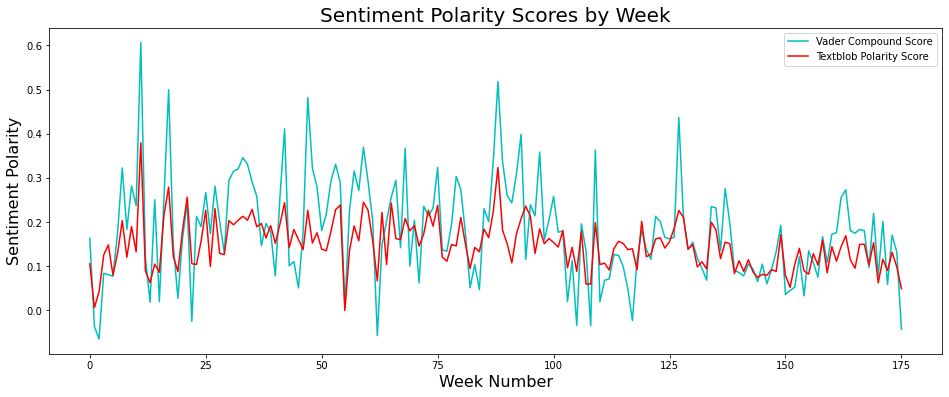

In [133]:
# Visualization
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)
plt.plot(df_q5_mean['week'], df_q5_mean['vader_com'], 'c',label = 'Vader Compound Score')
plt.plot(df_q5_mean['week'], df_q5_mean['textblob_polarity'], 'r', label = 'Textblob Polarity Score')
plt.xlabel('Week Number', fontsize=16)
plt.ylabel('Sentiment Polarity', fontsize=16)
plt.title('Sentiment Polarity Scores by Week', fontsize = 20)
plt.legend()
plt.show()

- The x-axis in the plot refers to the week number starting from 2017-01-20.
- In the plot above, the blue line represnets the Vader sentiment score, and the red line represents the Textblob sentiment score.
- For both VADER and Textblob, the higher sentiment score represent a more positive attitude, while lower sentiment scores represent a more negative attitude.

**Observation**
- There is obvious synchronization between the ups and downs of the blue and red lines. This means that the VADER sentiment is overall in aligned with the Textblob sentiment. 
- The sentiment polarity flucutates quite intensively in the first two and half years (125 weeks), roughly from 2017 Jan to 2019 July.
- Over time, the intensity and level of fluctuations of sentiment polarity decreased. There are less dramatic ups and downs from week 125 to week 175, roughly from 2019 July to 2020 May.

**Inferences**

- There are less flucutations Trump's tweets in terms of the sentiment polarity. The message conveyed in the tweets become mild since 2019 July.


- Several things happened around 2019 July:\
(a) Trump officially launches his 2020 reelection campaign.\
(b) Trump call to Ukraine president about investigation of Joe Biden and his son Hunter.\
(c) Trump met with Kim Jong-un, the Supreme Leader of North Korea.

    Reference
https://millercenter.org/president/trump/key-events


- These events may be correlated to the trend towards a milder tweeting style of Trump.


In [29]:
# Save the dataframe to an excel file
df_bonus_text.to_excel('df_bonus_text.xlsx', index = True)

### ii). Clean the collected data and conduct sentiment analysis to show polarity of each of these 10 scraped data points.

The sentiment analysis package for simplified Chinese\
https://towardsdatascience.com/beginners-guide-to-sentiment-analysis-for-simplified-chinese-using-snownlp-ce88a8407efb

In [32]:
# pip install snownlp
# import the package
from snownlp import SnowNLP

### Clean data

In [63]:
def text_clean_chi(text):
    text = re.sub(r'http\S+', '', text) # remove url
    text = re.sub(r"[^\w\s]", '',text) #remove puntucation
    text = re.sub(r"\s+", ' ',text) #remove multiple space
    text = re.sub(r"[0-9]", '',text) #remove numbers
    return text

In [60]:
df_bonus_text['clean'] = df_bonus_text['comment'].apply(text_clean_chi)

In [62]:
df_bonus_text.head(5)

,comment,clean
0,作为整张专辑的企划我只想说很感动，我们在有限的时间有限的金钱里做到了无限。因为爱；因为勇敢；...,作为整张专辑的企划我只想说很感动我们在有限的时间有限的金钱里做到了无限因为爱因为勇敢因为沟通...
1,超出预期每一首都好听尤其是OfCourse发音真的好,超出预期每一首都好听尤其是OfCourse发音真的好
2,加油呀小刘,加油呀小刘
3,OfCourse慵懒性感，英语发音好苏。\nU&I温暖大气，越听越开心，鼓舞人心\n练习曲，...,OfCourse慵懒性感英语发音好苏 UI温暖大气越听越开心鼓舞人心 练习曲安静又有点辛酸仿...
4,这张专辑让我路转粉转死忠🥰，真的很好听，听完也很有感悟，零点发的，听完哭了整整一夜😢😢刘雨昕...,这张专辑让我路转粉转死忠真的很好听听完也很有感悟零点发的听完哭了整整一夜刘雨昕未来可期加油


### Sentiment analysis

In [49]:
# Define a function to get the sentiment polarity score
def get_sent(text):
    t = SnowNLP(text)
    sent = t.sentiments
    return sent

In [64]:
# Create a new column to store the sentiment score
df_bonus_text['sentiment'] = df_bonus_text['comment'].apply(get_sent)

In [65]:
# Show top rows of the results
df_bonus_text.head(5)

,comment,clean,sentiment
0,作为整张专辑的企划我只想说很感动，我们在有限的时间有限的金钱里做到了无限。因为爱；因为勇敢；...,作为整张专辑的企划我只想说很感动我们在有限的时间有限的金钱里做到了无限因为爱因为勇敢因为沟通...,0.999986
1,超出预期每一首都好听尤其是OfCourse发音真的好,超出预期每一首都好听尤其是OfCourse发音真的好,0.314052
2,加油呀小刘,加油呀小刘,0.975966
3,OfCourse慵懒性感，英语发音好苏。\nU&I温暖大气，越听越开心，鼓舞人心\n练习曲，...,OfCourse慵懒性感英语发音好苏 UI温暖大气越听越开心鼓舞人心 练习曲安静又有点辛酸仿...,1.000000
4,这张专辑让我路转粉转死忠🥰，真的很好听，听完也很有感悟，零点发的，听完哭了整整一夜😢😢刘雨昕...,这张专辑让我路转粉转死忠真的很好听听完也很有感悟零点发的听完哭了整整一夜刘雨昕未来可期加油,0.998987


In [67]:
df_bonus_text.sentiment.describe()

count    200.000000
mean       0.746958
std        0.310183
min        0.000097
25%        0.520114
50%        0.920631
75%        0.999865
max        1.000000
Name: sentiment, dtype: float64

The sentiment range from 0 to 1 with 0 represent negative sentiment while 1 represent positive sentiment.\
Among the reviews, the average sentiment polarity is 0.74, indicating there is a positive sentiment towards this album.

<AxesSubplot:ylabel='Frequency'>

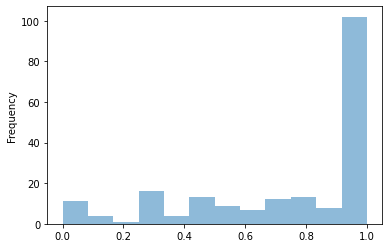

In [77]:
df_bonus_text.sentiment.plot.hist(bins=12, alpha=0.5)

The histogram indicates a centralized and positive sentiment of the album reviews.